<a href="https://colab.research.google.com/github/hosseindamavandi/Fake-News-Detection/blob/main/Note-Books/ANN/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/Neuromatch

/content/drive/MyDrive/Neuromatch


In [3]:
"""
data manipulatig
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

"""
natural language processing
"""
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
true_data = pd.read_csv('datasets/True.csv')
fake_data = pd.read_csv('datasets/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [9]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
922,WATCH: Trump Insults Poland By Downplaying Th...,Six million Poles lost their lives during Worl...,News,"July 6, 2017",0
4926,Congressional Black Caucus Condemns Trump: He...,Democratic members of the Congressional Black ...,News,"August 23, 2016",0
5808,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,politicsNews,"February 1, 2017",1
9684,"Connecticut readies austerity budget vote, aim...",NEW YORK (Reuters) - Connecticut’s lawmakers a...,politicsNews,"May 4, 2016",1
6295,Trump vows 'insurance for everybody' in replac...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 16, 2017",1
9865,"U.S. judge approves court, police accord for F...",(Reuters) - A federal judge on Tuesday approve...,politicsNews,"April 19, 2016",1
2997,Trump Demands Apology From The Media And Gets...,"Donald Trump, the pathetic man who has yet to ...",News,"January 15, 2017",0
6887,Five Women Donald Trump Allegedly Slept With ...,Donald Trump obviously has a knack for purchas...,News,"April 15, 2016",0
985,"Trump Crumbles In GOP Health Care Meeting, Do...","Yesterday, after Senate Majority Leader Sen. M...",News,"June 28, 2017",0
16445,NEW DOCUMENTS: Hillary And State Department Ai...,Hillary Clinton and her aides must have felt l...,Government News,"Aug 19, 2016",0


In [10]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
922,WATCH: Trump Insults Poland By Downplaying Th...,Six million Poles lost their lives during Worl...,"July 6, 2017",0,0,0,1,0,0,0,0,0
4926,Congressional Black Caucus Condemns Trump: He...,Democratic members of the Congressional Black ...,"August 23, 2016",0,0,0,1,0,0,0,0,0
5808,"Germany's Schulz calls Trump 'un-American', wa...",BERLIN (Reuters) - Germany’s center-left chanc...,"February 1, 2017",1,0,0,0,0,0,0,1,0
9684,"Connecticut readies austerity budget vote, aim...",NEW YORK (Reuters) - Connecticut’s lawmakers a...,"May 4, 2016",1,0,0,0,0,0,0,1,0
6295,Trump vows 'insurance for everybody' in replac...,WASHINGTON (Reuters) - U.S. President-elect Do...,"January 16, 2017",1,0,0,0,0,0,0,1,0


In [12]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 922 to 16892
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 1.7+ MB


In [ ]:
nltk.download('all')

In [14]:
from nltk.stem.porter import *
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.text:
    txt = re.sub(pattern, " ", txt)  # Cleaning
    txt = txt.lower()  # Lowering
    txt = nltk.word_tokenize(txt)  # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)
    new_text.append(txt)

new_text[0]

'six million pole lost their life dure world war ii but to donald trump that s just tough perhap no nation suffer a much devast a poland did dure the war the nation wa invad and terror by the nazi and then invad and terror by the soviet union poland wa caught in the middl a two brutal militari power clash poland experienc war first hand a well a poverti homeless starvat diseas and the holocaust in fact poland lost the highest percentag of citizen dure the war and it popul did not recov until the s on top of that poland went from suffer under nazi rule to suffer under soviet rule the soviet sent pole to gulag throughout the soviet union commun would domin poland until the free elect of and after that commun in eastern europ and the soviet union itself collaps the utter devast suffer by poland demand proper recognit and trump prove that he is incap of express true sad about such a human tragedi dure hi speech to the peopl of poland trump spoke of poland s tragic histori a if it wa simpli

In [15]:
from nltk.stem.porter import *
new_title = []
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.title:
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)

    stemmer = PorterStemmer()
    txt = stemmer.stem(txt)

    new_title.append(txt)
new_title[0]

'watch trump insult poland by downplay the horror they experienc dure world war ii'

In [16]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [17]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 922 to 16892
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 1.0 MB


In [18]:
data.head()

,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
922,0,0,0,1,0,0,0,0,0
4926,0,0,0,1,0,0,0,0,0
5808,1,0,0,0,0,0,0,1,0
9684,1,0,0,0,0,0,0,1,0
6295,1,0,0,0,0,0,0,1,0


In [19]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [20]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [36]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [37]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


In [38]:
"""
pytorch
"""

import torch
import torch.nn as nn
"""
visualization tools
"""

import matplotlib.pyplot as plt
import seaborn as sns

"""
train test split
"""
from sklearn.model_selection import train_test_split

In [39]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


error = nn.CrossEntropyLoss()

In [40]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs,Y_train)

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.6936366558074951
Loss after iteration 1 is 6.372745037078857
Loss after iteration 2 is 1.019850254058838
Loss after iteration 3 is 3.0821990966796875
Loss after iteration 4 is 0.6913647055625916
Loss after iteration 5 is 0.9777719974517822
Loss after iteration 6 is 0.7232015132904053
Loss after iteration 7 is 0.6572808623313904
Loss after iteration 8 is 0.7141530513763428
Loss after iteration 9 is 0.6600246429443359
Loss after iteration 10 is 0.582186758518219
Loss after iteration 11 is 0.5361445546150208
Loss after iteration 12 is 0.4933028817176819
Loss after iteration 13 is 0.4402386248111725
Loss after iteration 14 is 0.36365222930908203
Loss after iteration 15 is 0.23730362951755524
Loss after iteration 16 is 0.21831080317497253
Loss after iteration 17 is 0.15897244215011597
Loss after iteration 18 is 0.17275185883045197
Loss after iteration 19 is 0.15927647054195404


In [41]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([-1.7067, -4.5773], grad_fn=<SelectBackward0>)
tensor(0)
Model accuracy is  0.9675723830734967


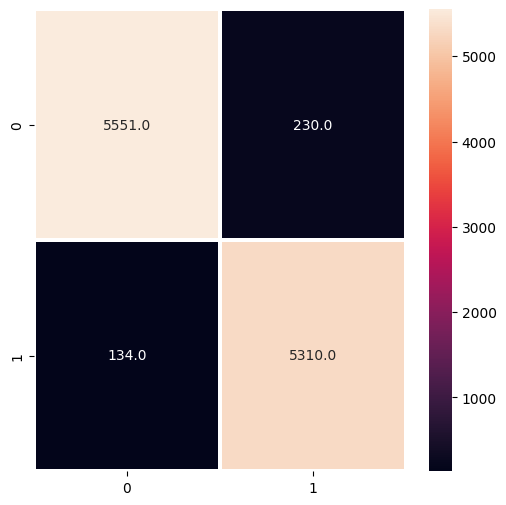

In [42]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()